# Introduction to K-Means Clustering with Python

## Introduction
K-Means clustering is a powerful unsupervised learning algorithm used to identify and group similar data points together into clusters. It is widely applied in data analysis to discover patterns and insights without prior knowledge of the data categories. This Google Colab notebook provides a hands-on approach to understanding the k-means clustering algorithm by implementing it from scratch. We'll explore each step of the algorithm, including initializing centroids, assigning clusters, updating centroids, and visualizing the results iteratively.

## Objectives
The primary objectives of this notebook are to:

1. **Understand the K-Means Algorithm**: Learn the theory behind the k-means clustering algorithm, including its objectives and how it operates iteratively to minimize the within-cluster sum of squares.

2. **Implement K-Means from Scratch**: Manually implement the k-means algorithm in Python to gain a deeper understanding of each step involved in the process.

3. **Visualize Clustering Steps**: Use matplotlib to visualize the clustering process step-by-step, observing how initial random centroids are adjusted through iterations to form well-defined clusters.

4. **Explore Convergence of the Algorithm**: Investigate how the k-means algorithm converges to a solution, understanding the impact of different initializations and parameters like the number of clusters.

5. **Demonstrate Practical Applications**: Highlight potential real-world applications of k-means clustering in various domains such as market segmentation, document clustering, and image segmentation.

By the end of this notebook, you should have a solid understanding of how k-means clustering works, along with practical experience in implementing and visualizing the algorithm using Python.


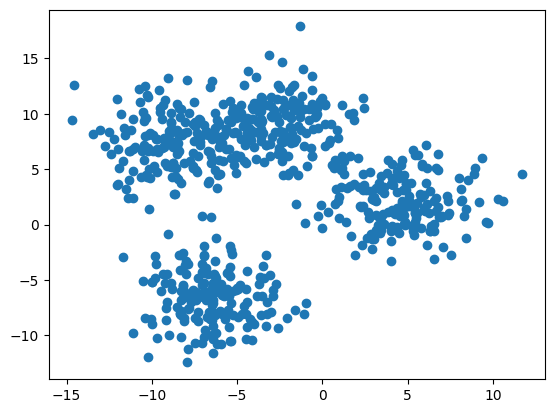

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import time

# Generating synthetic data
X, _ = make_blobs(n_samples=700, centers=4, cluster_std=2.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1])
plt.show()


## Initializing Centroids for K-Means Clustering

### Overview
The initialization of centroids is a crucial first step in the k-means clustering algorithm. Centroids are the central points of the clusters that the algorithm will iteratively try to identify in the dataset. The quality of the initial centroids can significantly impact the effectiveness and efficiency of the clustering process.

### Purpose of Centroid Initialization
- **Starting Point for Clustering**: Centroids serve as the initial 'guess' for the center of clusters. The entire k-means algorithm revolves around refining these guesses to more accurately reflect the true centers of clusters in the data.
- **Influence on Convergence**: Good initial centroids can lead to faster convergence of the k-means algorithm to an optimal or near-optimal solution. Poor initial choices can lead to suboptimal clustering that does not accurately capture the natural divisions in the data.

### Process of Initialization
1. **Selection of Cluster Number**: Before initializing centroids, the number of clusters, `k`, must be decided. This number dictates how many distinct groups the algorithm will try to identify in the data.
2. **Random Selection**: The initial centroids are typically chosen at random from the dataset. This randomness is intended to provide an unbiased start for the clustering process.
3. **Reproducibility Consideration**: To ensure that the clustering process can be consistently reproduced, especially important in scientific and academic settings, a random seed is often set. This seed ensures that the same initial centroids are chosen every time the process is initiated with the same seed and dataset.

### Visualization
After selecting the initial centroids, they are often visualized along with the data. This visualization serves multiple purposes:
- **Validation**: It allows for a visual check to ensure centroids are appropriately distributed among the data.
- **Insight**: Provides an immediate, intuitive understanding of how well the potential centroids represent the data distribution.
- **Iteration Preparation**: Sets the stage for the next steps in the k-means algorithm, where these centroids will begin to be adjusted based on the structure of the data.



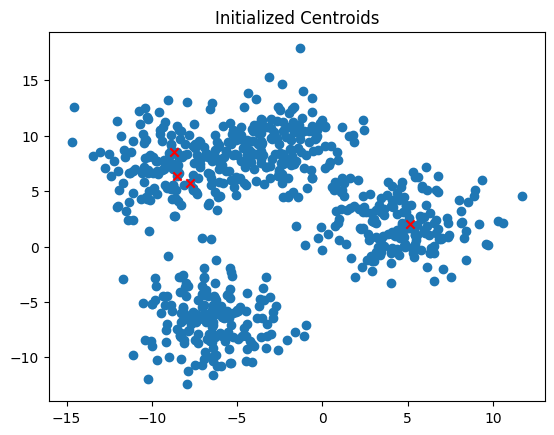

In [2]:
def initialize_centroids(X, k, seed=30):
    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

k = 4  # Number of clusters
centroids = initialize_centroids(X, k)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  # Mark centroids
plt.title("Initialized Centroids")
plt.show()


## Assigning Clusters and Visualizing Results in K-Means Clustering

### Overview
After initializing centroids, the next critical step in the k-means clustering algorithm involves assigning each data point in the dataset to the nearest centroid. This assignment forms the preliminary clusters which the algorithm will refine iteratively.

### Purpose of Cluster Assignment
- **Forming Clusters**: This step categorizes each data point into a cluster based on which centroid it is closest to. It marks the beginning of the clustering process where groups start to form around the centroids.
- **Foundation for Optimization**: By assigning data points to the nearest centroid, we create an initial grouping that the algorithm will continuously optimize. The aim is to minimize the distances within each cluster to achieve more cohesive groups.

### Visualization Post-Assignment
After data points have been assigned to clusters based on the nearest centroid, visualizing this clustering helps in several ways:
- **Immediate Feedback**: Provides a visual confirmation of how the data points are being grouped, allowing for a quick assessment of the initial effectiveness of the centroids.
- **Insight into Data Structure**: Helps in understanding the underlying data distribution and how well the chosen centroids represent different segments of the data.
- **Adjustment Guide**: Acts as a diagnostic tool to decide if a different strategy for initializing centroids or a different number of clusters might be needed based on how dispersed or cohesive the initial clusters appear.

### Process of Cluster Assignment and Visualization
1. **Calculating Distances**: The algorithm calculates the distance of each data point from every centroid.
2. **Determining the Nearest Centroid**: Each data point is then assigned to the nearest centroid based on these calculated distances.
3. **Visual Representation**: The clusters formed by these assignments are then visualized. Each cluster is usually marked by a distinct color, and the centroids are highlighted, often with a different marker or color.



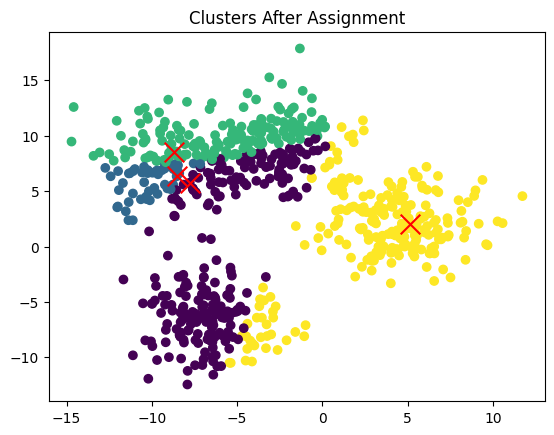

In [3]:
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def plot_clusters(X, centroids, clusters, title="Clusters After Assignment"):
  plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
  plt.title(title)
  plt.show()

# Assign clusters
clusters = assign_clusters(X, centroids)

# Plot clusters
plot_clusters(X, centroids, clusters)

## Updating Centroids in K-Means Clustering

### Overview
Once initial clusters are formed by assigning each data point to the nearest centroid, the next crucial step in the k-means clustering process is to update the centroids based on the newly formed clusters. This iterative refinement continues until the centroids do not move significantly, indicating convergence.

### Purpose of Updating Centroids
- **Refine Cluster Centers**: Updating the centroids involves calculating the geometric center (mean) of all the points that have been assigned to each cluster. This refinement step ensures that the centroids more accurately represent the data points in their cluster.
- **Drive Convergence**: By continuously updating and moving the centroids to better represent their respective clusters, the algorithm iteratively improves the cluster quality, which ideally leads to convergence on an optimal clustering configuration.

### Process of Updating Centroids
1. **Calculate New Centroids**: For each cluster, the mean position of all the data points currently assigned to that cluster is calculated. This mean position becomes the new centroid for that cluster.
2. **Implement Iterative Updates**: This process is repeated iteratively. After each update, data points are reassigned to the closest centroid, potentially forming new clusters. The centroids are then updated again based on these new assignments.

### Visualization of Cluster Updates
After updating the centroids, it is common practice to visualize the clusters. This serves multiple purposes:
- **Tracking Progress**: Visualization after each update allows observers to see how the centroids move and how clusters change with each iteration, providing insight into the convergence process of the algorithm.
- **Assessing Convergence**: By visually assessing how much the centroids move between iterations, one can determine if the algorithm is close to convergence (when centroids no longer move significantly).

### Example of Iterative Updating and Visualization
In practice, the iterative process involves:
- Reassigning clusters based on the current centroids.
- Visualizing the current state of clusters.
- Updating centroids based on the new cluster assignments.
- Repeating this process a set number of times or until centroids do not change significantly, indicating that the clusters have stabilized and the algorithm has potentially converged.



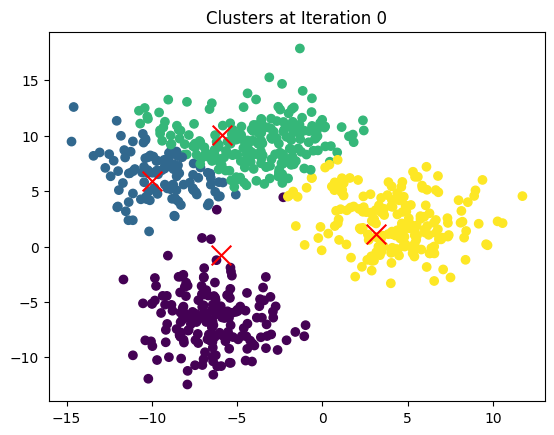

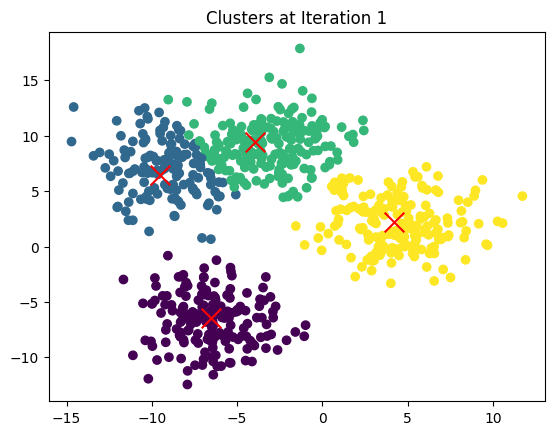

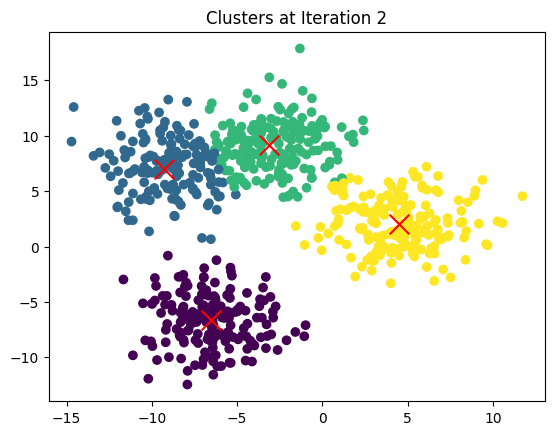

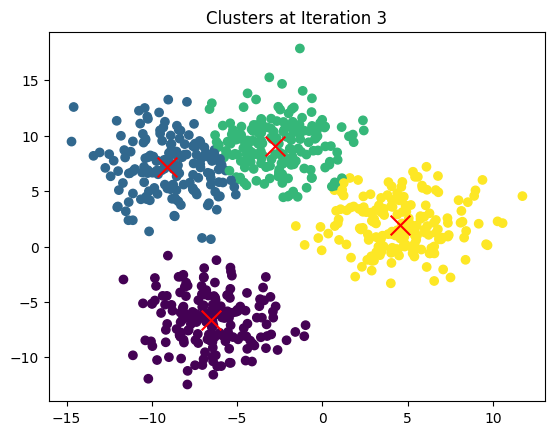

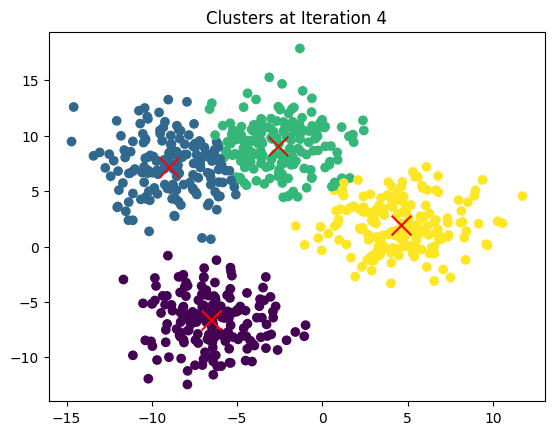

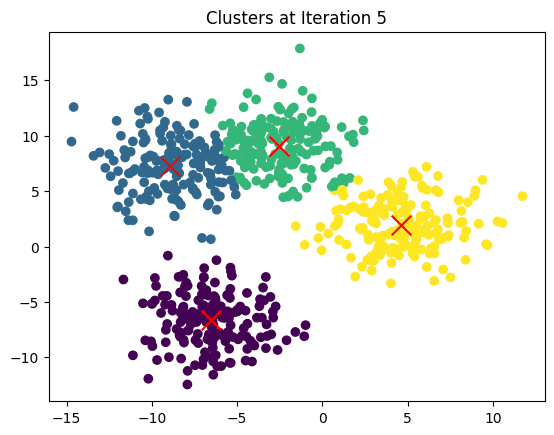

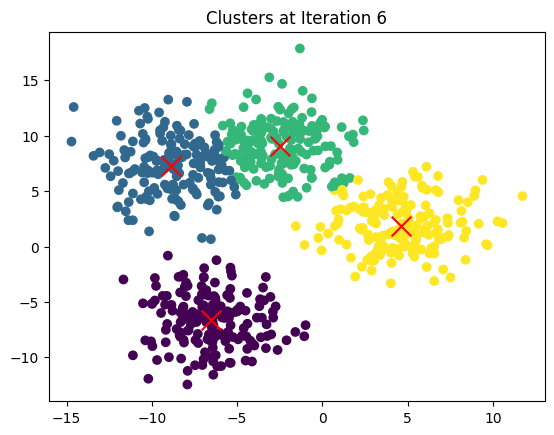

In [4]:
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

centroids = update_centroids(X, clusters, k)

def plot_clusters(X, centroids, clusters, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    plt.title(f"Clusters at Iteration {iteration}")
    plt.show()

max_iterations = 10
for i in range(max_iterations):
    clusters = assign_clusters(X, centroids)
    plot_clusters(X, centroids, clusters, i)
    new_centroids = update_centroids(X, clusters, k)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids
    time.sleep(2)  # Pause for 2 seconds before the next iteration